In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [2]:
%cd DRL-for-Automated-Stock-Trading--main/

/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main


In [4]:
!pip install git+https://github.com/mingl2000/Elegant-FinRL.git
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/mingl2000/Elegant-FinRL.git to /tmp/pip-req-build-xth535kz
  Running command git clone -q https://github.com/mingl2000/Elegant-FinRL.git /tmp/pip-req-build-xth535kz
     |████████████████████████████████| 6.4 MB 10.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for elegant-finrl: filename=elegant_finrl-0.3.1-py3-none-any.whl size=34902 sha256=f27f6daaef70192314e4a3321ec5f7908a32a3ee5cf7d432ad5aa5ac7bc7ece7
  Stored in directory: /tmp/pip-ephem-wheel-cache-t4ndwfw4/wheels/57/02/a8/4e78b0a04b4c639b82cfe4454022c7a54b0e43d76f42fc6255
Successfully built elegant-finrl
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into 

In [5]:
#Imports for enviornment and agent 
from elegant_drl_model.run import *
#from elegant_finrl.agent import AgentPPO, AgentDDPG
from elegant_drl_model.env import StockTradingEnv
from elegant_drl_model import agent
import yfinance as yf
from stockstats import StockDataFrame as Sdf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [ ]:
#from importlib import reload  # Py3 only; unneeded in py2.
#args.agent = reload(agent)

### Train PPO Agent

In [ ]:
# Setup the agent 
args = Arguments(if_on_policy=True)
#args.agent = agent.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()
args.agent = agent.AgentPPO()
args.agent.lambda_entropy = 0.04

# Environment
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 
           'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ',
           'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']  

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2009-01-01'
start_eval_date = '2019-01-01'
end_eval_date = '2021-01-01'

args.env = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=False)
args.env_eval = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=True)

args.env.target_reward = 2
args.env_eval.target_reward = 2

# Hyperparameters
args.gamma = gamma
args.tau = 0.97
args.l2_reg = 1e-3
args.max_k1 = 1e-2
args.damping = 1e-1
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10 
args.repeat_times = 2 ** 3
args.target_step = 2 ** 12
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.rollout_num = 2 # the number of rollout workers (larger is not always faster)

train_and_evaluate_mp(args) # the training process will terminate once it reaches the target reward.

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| multiprocessing, act_workers: 2
| multiprocessing, None:
| GPU id: 0, cwd: ./AgentPPO/StockTradingEnv-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:871: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:871: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/run.py:462: UserWarning: Creating a tens

0   0.00e+00      1.23 |
0   1.51e+04      1.30 |
0   4.53e+04      1.31 |
0   8.05e+04      1.33 |
0   1.31e+05      1.36 |
0   1.36e+05      1.36 |    1.36      0.00      -0.50      1.86
0   1.41e+05      1.37 |
0   1.61e+05      1.40 |
| print_state_norm(): state_dim: torch.Size([7545, 301]) is too large to print its norm. 
| SavedDir: ./AgentPPO/StockTradingEnv-v2_0
| UsedTime: 396


### Evaluate PPO Agent

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| GPU id: 0, cwd: ./AgentPPO/StockTradingEnv-v2_0
Loaded act: ./AgentPPO/StockTradingEnv-v2_0
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/env.py:367: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_df = data_df.drop("adjcp", 1)


Start date,2019-01-02
End date,2020-12-31
Total months,24
,Backtest
Annual return,18.285%
Cumulative returns,40.006%
Annual volatility,30.635%
Sharpe ratio,0.70
Calmar ratio,0.46
Stability,0.38
Max drawdown,-40.14%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,40.14,2020-01-16,2020-03-23,2020-09-01,164
1,9.72,2019-07-30,2019-08-27,2019-11-01,69
2,9.48,2020-10-12,2020-10-30,2020-11-09,21
3,9.38,2019-03-18,2019-05-31,2019-07-11,84
4,8.88,2020-09-02,2020-09-23,2020-10-12,29


Stress Events,mean,min,max
New Normal,0.09%,-13.48%,13.24%


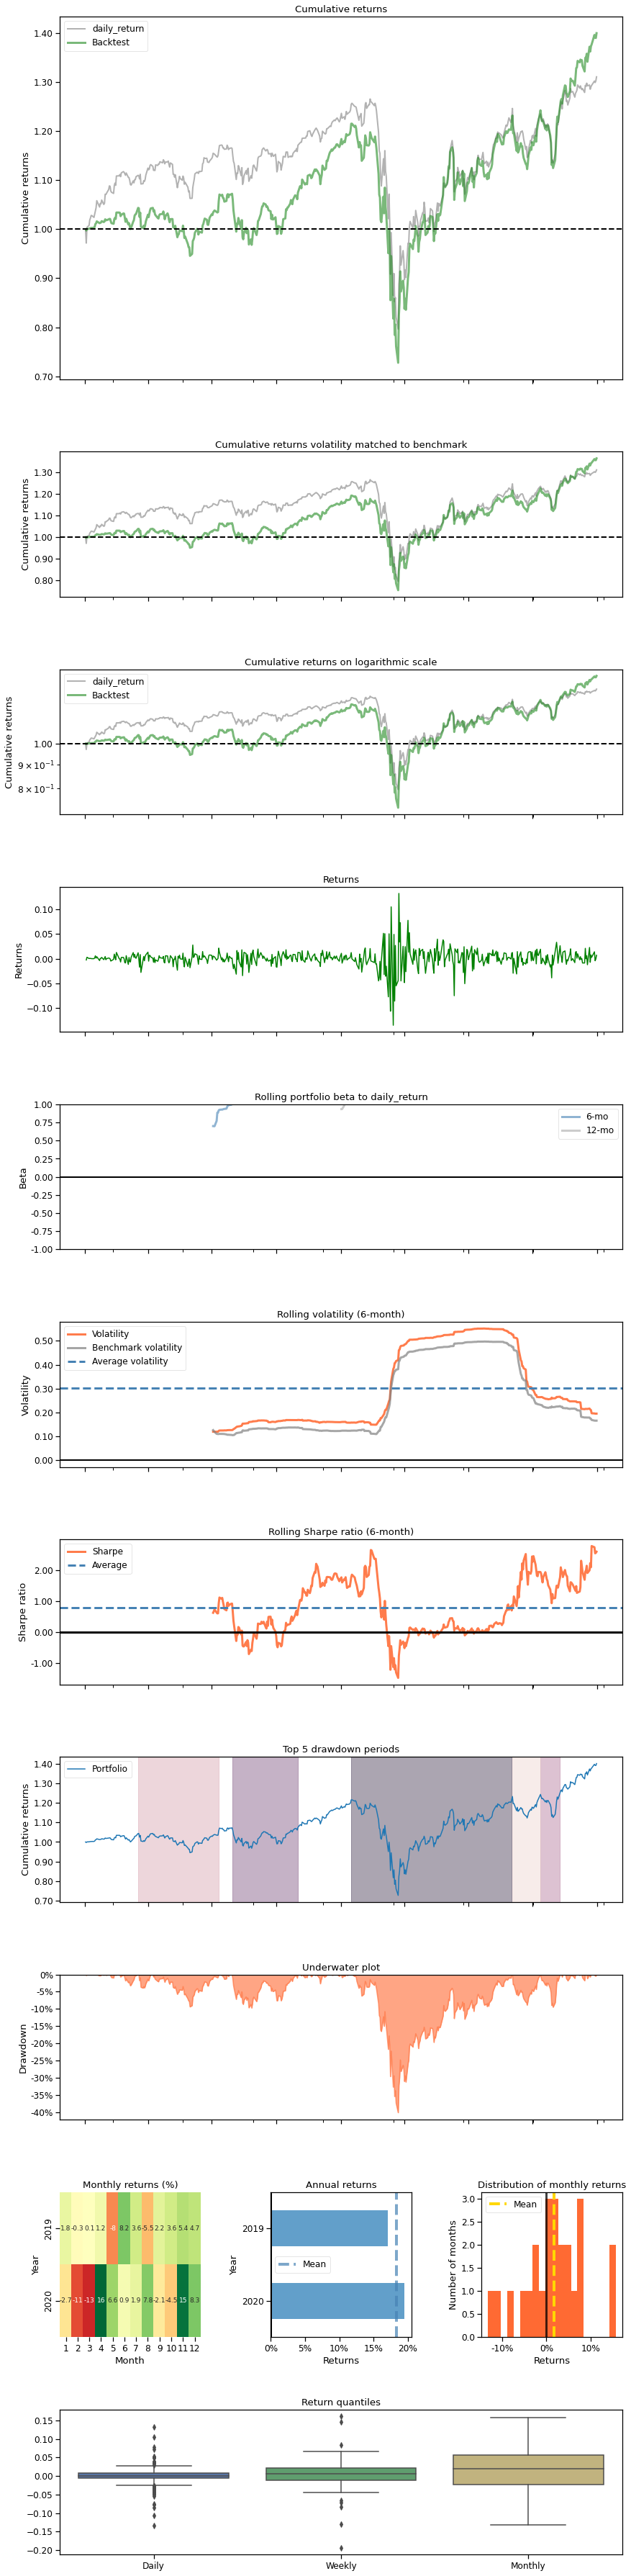

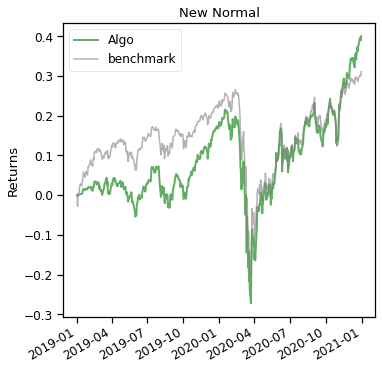

In [ ]:
args = Arguments(if_on_policy=True)
args.agent = agent.AgentPPO()
args.env = StockTradingEnv(cwd='./', if_eval=True)
args.if_remove = False
args.cwd = './AgentPPO/StockTradingEnv-v2_0'
args.init_before_training()

prediction = args.env.trade_prediction(args, torch)
args.env.backtest_plot(prediction, baseline_ticker = '^DJI', baseline_start = '2019-01-01', baseline_end = '2021-01-01')

### Train TD3 Agent

In [6]:
# Setup the agent 
args = Arguments(if_on_policy=False)
#args.agent = agent.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()
args.agent = agent.AgentTD3()
args.agent.lambda_entropy = 0.04

# Environment
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 
           'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ',
           'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']  

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2009-01-01'
start_eval_date = '2019-01-01'
end_eval_date = '2021-01-01'

args.env = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=False)
args.env_eval = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=True)

args.env.target_reward = 2
args.env_eval.target_reward = 2

# Hyperparameters
args.gamma = gamma
args.tau = 0.97
args.l2_reg = 1e-3
args.max_k1 = 1e-2
args.damping = 1e-1
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10 
args.repeat_times = 2 ** 3
args.target_step = 2 ** 12
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.rollout_num = 2 # the number of rollout workers (larger is not always faster)

train_and_evaluate_mp(args) # the training process will terminate once it reaches the target reward.

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| multiprocessing, act_workers: 2
| multiprocessing, None:
| GPU id: 0, cwd: ./AgentTD3/StockTradingEnv-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:502: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach_()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:502: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach_()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/run.py:462: UserWarning: Creating a te

0   0.00e+00      1.39 |
0   4.10e+03      1.39 |    1.39      0.00   -264567.84  8048820.00
0   8.19e+03      1.41 |
0   1.23e+04      1.41 |    1.41      0.02   -2879486.50  325500640.00
0   2.05e+04      1.41 |    1.20      0.00   -3328092.25  315382720.00
0   2.87e+04      1.41 |    1.11      0.01   -3497255.00  358083136.00
0   3.69e+04      1.41 |    1.33      0.00   -3637210.50  553942848.00
0   4.51e+04      1.41 |    1.35      0.01   -4290657.50  666145152.00
0   5.32e+04      1.41 |    1.25      0.00   -4660836.50  684522624.00
0   6.14e+04      1.41 |    1.40      0.01   -4656851.50  370744416.00
0   6.96e+04      1.41 |    1.28      0.01   -7587299.00  764185216.00
0   7.78e+04      1.41 |    1.28      0.01   -7768009.00  911675648.00
0   7.78e+04      1.45 |
0   8.60e+04      1.45 |    1.41      0.01   -8008986.50  2133167616.00
0   9.42e+04      1.45 |    1.39      0.00   -10987596.00  3702385920.00
0   1.02e+05      1.45 |    1.31      0.01   -8021739.00  1196210432.00
0

### Evaluate TD3 Agent

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| GPU id: 0, cwd: ./AgentTD3/StockTradingEnv-v2_0
Loaded act: ./AgentTD3/StockTradingEnv-v2_0
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/env.py:367: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_df = data_df.drop("adjcp", 1)


Start date,2019-01-02
End date,2020-12-31
Total months,24
,Backtest
Annual return,25.407%
Cumulative returns,57.41%
Annual volatility,30.251%
Sharpe ratio,0.90
Calmar ratio,0.64
Stability,0.11
Max drawdown,-40.009%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,40.01,2020-01-02,2020-03-23,2020-11-10,224
1,8.76,2019-07-29,2019-08-23,2019-11-08,75
2,4.24,2019-04-26,2019-05-31,2019-06-07,31
3,3.58,2019-03-15,2019-03-25,2019-04-12,21
4,3.14,2020-11-10,2020-11-12,2020-11-16,5


Stress Events,mean,min,max
New Normal,0.11%,-10.71%,12.04%


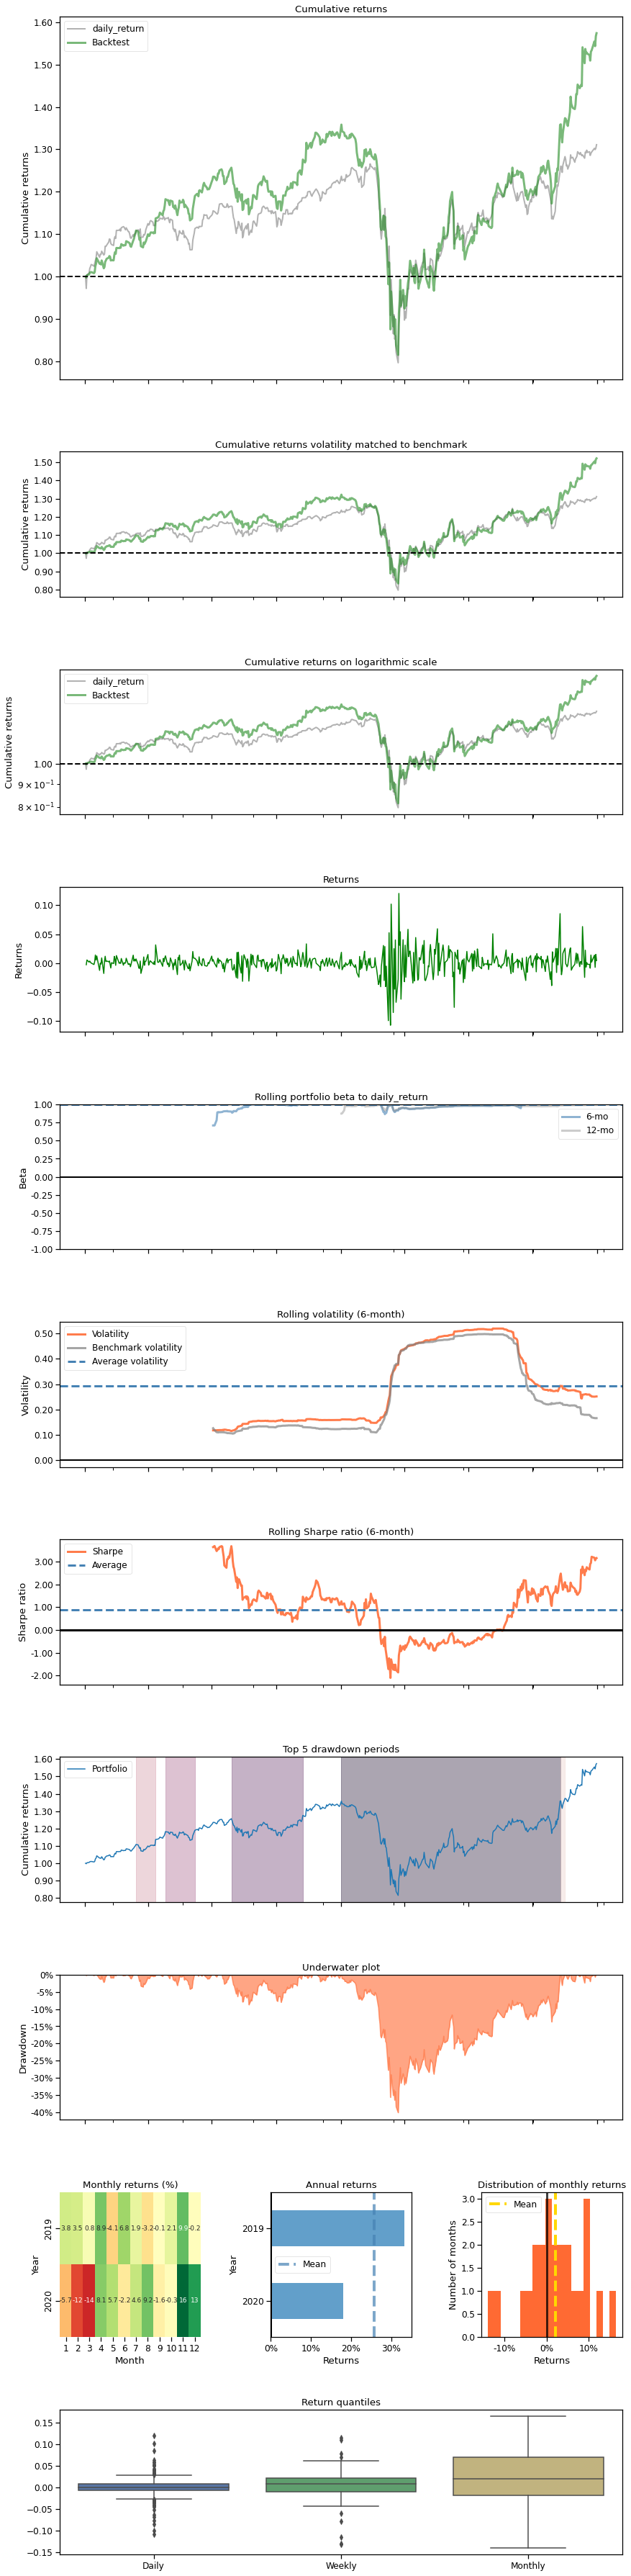

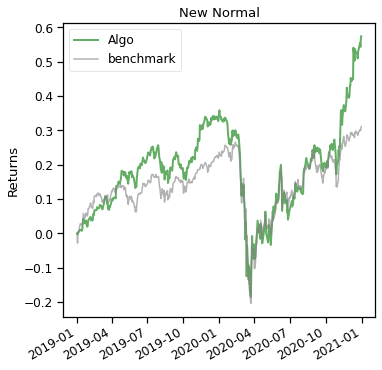

In [9]:
args = Arguments(if_on_policy=True)
args.agent = agent.AgentTD3()
args.env = StockTradingEnv(cwd='./', if_eval=True)
args.if_remove = False
args.cwd = './AgentTD3/StockTradingEnv-v2_0'
args.init_before_training()

prediction = args.env.trade_prediction(args, torch)
args.env.backtest_plot(prediction, baseline_ticker = '^DJI', baseline_start = '2019-01-01', baseline_end = '2021-01-01')

### Train SAC Agent

In [7]:
# Setup the agent 
args = Arguments(if_on_policy=False)
#args.agent = agent.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()
args.agent = agent.AgentModSAC()
args.agent.lambda_entropy = 0.04

# Environment
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 
           'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ',
           'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']  

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2009-01-01'
start_eval_date = '2019-01-01'
end_eval_date = '2021-01-01'

args.env = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=False)
args.env_eval = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=True)

args.env.target_reward = 2
args.env_eval.target_reward = 2
# Hyperparameters
args.gamma = gamma
args.tau = 0.97
args.l2_reg = 1e-3
args.max_k1 = 1e-2
args.damping = 1e-1
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10 
args.repeat_times = 2 ** 3
args.target_step = 2 ** 12
args.eval_gap = 2 ** 3
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 3
args.if_allow_break = False
args.rollout_num = 2 # the number of3rollout worker (larger is not always faster)                                                                                                                                                    
train_and_evaluate_mp(args) # the trining process will terminate once it reaches the target reward.3

3333

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| multiprocessing, act_workers: 2
| multiprocessing, None:
| GPU id: 0, cwd: ./AgentModSAC/StockTradingEnv-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:631: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach_()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/agent.py:631: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  states = torch.as_tensor((state,), dtype=torch.float32, device=self.device).detach_()
/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/run.py:462: UserWarning: Creating a te

0   0.00e+00      1.33 |
0   4.10e+03      1.33 |    1.33      0.02       1.09  234464.13
0   8.19e+03      1.33 |    1.32      0.02       7.39  77716.21
0   1.23e+04      1.33 |    1.33      0.02       7.39  18246.26
0   1.64e+04      1.33 |    1.33      0.02       7.39   3163.59
0   1.64e+04      1.33 |
0   2.05e+04      1.33 |    1.33      0.02       7.39    455.23
0   2.46e+04      1.33 |    1.31      0.01       7.39    373.22
0   2.87e+04      1.33 |    1.33      0.02       7.39    263.23
0   3.28e+04      1.33 |    1.33      0.02       7.39    255.09
0   3.69e+04      1.33 |    1.32      0.01       7.39    293.46
0   3.69e+04      1.33 |
0   4.10e+04      1.33 |    1.33      0.02       7.39    233.12
0   4.51e+04      1.33 |    1.33      0.02       7.39    244.53
0   4.92e+04      1.33 |    1.33      0.02       7.39    235.56
0   4.92e+04      1.33 |
0   5.32e+04      1.33 |    1.33      0.02       7.39    297.39
0   5.73e+04      1.33 |    1.33      0.02       7.39    204.46
0  

### Evaluate SAC Agent

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| GPU id: 0, cwd: ./AgentModSAC/StockTradingEnv-v2_0
Loaded act: ./AgentModSAC/StockTradingEnv-v2_0
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


Start date,2019-01-02
End date,2020-12-31
Total months,24
,Backtest
Annual return,16.225%
Cumulative returns,35.162%
Annual volatility,29.095%
Sharpe ratio,0.66
Calmar ratio,0.42
Stability,0.05
Max drawdown,-39.076%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.08,2020-01-17,2020-03-23,2020-11-09,212
1,8.58,2019-07-15,2019-08-27,2019-11-15,90
2,5.63,2019-04-29,2019-05-31,2019-06-19,38
3,2.86,2020-11-16,2020-11-20,2020-11-24,7
4,2.72,2019-02-25,2019-03-07,2019-03-13,13


Stress Events,mean,min,max
New Normal,0.08%,-13.15%,11.03%


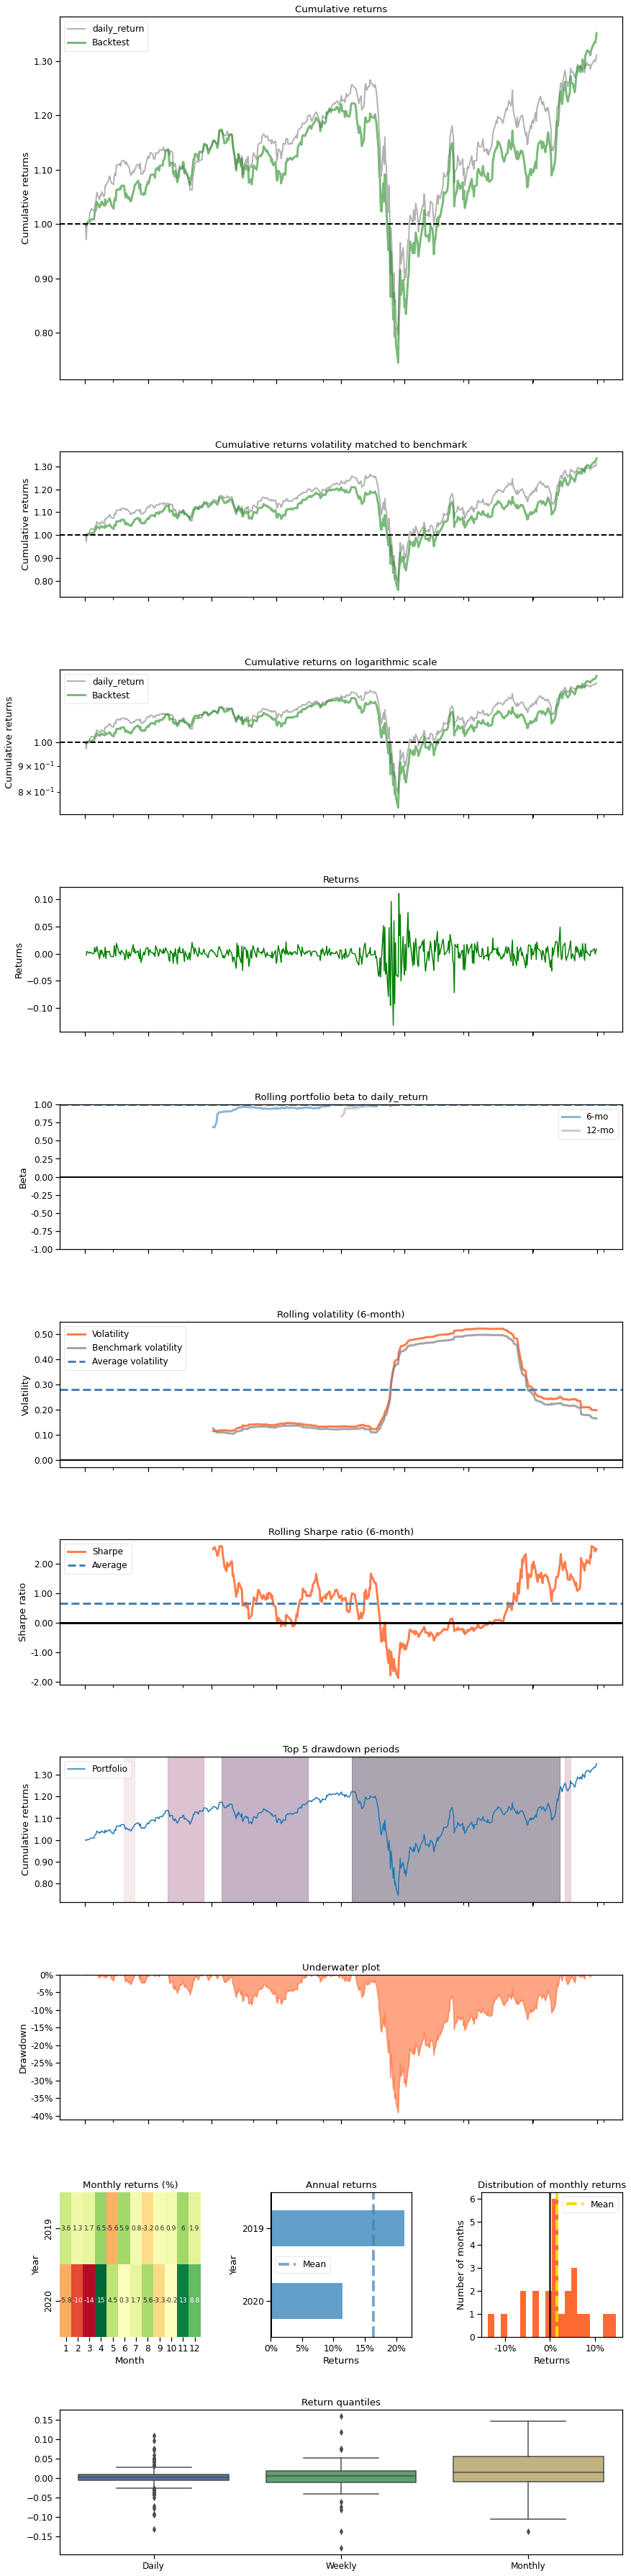

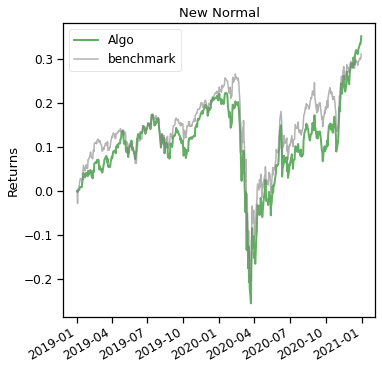

In [10]:
args = Arguments(if_on_policy=True)
args.agent = agent.AgentModSAC()
args.env = StockTradingEnv(cwd='./', if_eval=True)
args.if_remove = False
args.cwd = './AgentModSAC/StockTradingEnv-v2_0'
args.init_before_training()

prediction = args.env.trade_prediction(args, torch)
args.env.backtest_plot(prediction, baseline_ticker = '^DJI', baseline_start = '2019-01-01', baseline_end = '2021-01-01')

### Train TRPO Agent

In [9]:
# Setup the agent 
args = Arguments(if_on_policy=True)
#args.agent = agent.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()
args.agent = agent.AgentTRPO()
args.agent.lambda_entropy = 0.04

# Environment
tickers = ['AAPL', 'MSFT', 'JPM', 'V', 'RTX', 'PG', 'GS', 'NKE', 'DIS', 'AXP', 
           'HD', 'INTC', 'WMT', 'IBM', 'MRK', 'UNH', 'KO', 'CAT', 'TRV', 'JNJ',
           'CVX', 'MCD', 'VZ', 'CSCO', 'XOM', 'BA', 'MMM', 'PFE', 'WBA', 'DD']  

tech_indicator_list = [
  'macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30',
  'close_30_sma', 'close_60_sma']  # finrl.config.TECHNICAL_INDICATORS_LIST

gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)
buy_cost_pct = 1e-3
sell_cost_pct = 1e-3
start_date = '2009-01-01'
start_eval_date = '2019-01-01'
end_eval_date = '2021-01-01'

args.env = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=False)
args.env_eval = StockTradingEnv('./', gamma, max_stock, initial_capital, buy_cost_pct, 
                           sell_cost_pct, start_date, start_eval_date, 
                           end_eval_date, tickers, tech_indicator_list, 
                           initial_stocks, reward_scaling=1e-4, if_eval=True)

args.env.target_reward = 2
args.env_eval.target_reward = 2

# Hyperparameters
args.gamma = gamma
args.tau = 0.97
args.l2_reg = 1e-3
args.max_k1 = 1e-2
args.damping = 1e-1
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 13
args.repeat_times = 2 ** 3
args.target_step = 2 ** 12
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = Fals
args.rollout_num = 2 # the number of rollout workers (larger is not always faster)
train_and_evaluate_mp(args) # the trining process will terminate once it reaches the target reward.3

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| multiprocessing, act_workers: 2
| multiprocessing, None:
| GPU id: 0, cwd: ./AgentTRPO/StockTradingEnv-v2_0
| Remove history
ID      Step      MaxR |    avgR      stdR       objA      objC
0   0.00e+00      1.06 |
0   1.01e+04      1.09 |
0   1.51e+04      1.09 |    1.09      0.15       0.00     -4.30
0   1.51e+04      1.20 |
0   3.02e+04      1.20 |    1.11      0.15      -0.00   -666.82
0   4.53e+04      1.20 |    1.07      0.14       0.00  -14314.05
0   5.53e+04      1.21 |
0   6.04e+04      1.21 |    1.21      0.14      -0.00  -23512.01
0   7.04e+04      1.23 |
0   7.54e+04      1.23 |    1.23      0.13       0.00  -34408.41
0   9.05e+04      1.23 |    1.20      0.15       0.00  -60006.17
0   1.06e+05      1.23 |    1.17      0.13       0.00   -104.61
0   1.16e+05      1.26 |
0   1.21e+05     

### Evaluate TRPO Agent

| load data: .//StockTradingEnv_trading_data.df
| YahooDownloader: finish processing date list
| GPU id: 0, cwd: ./AgentTRPO/StockTradingEnv-v2_0
Loaded act: ./AgentTRPO/StockTradingEnv-v2_0
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (505, 8)


/content/drive/My Drive/DRL-for-Automated-Stock-Trading--main/elegant_drl_model/env.py:367: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_df = data_df.drop("adjcp", 1)


Start date,2019-01-02
End date,2020-12-31
Total months,24
,Backtest
Annual return,23.004%
Cumulative returns,51.424%
Annual volatility,17.735%
Sharpe ratio,1.26
Calmar ratio,1.74
Stability,0.84
Max drawdown,-13.189%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.19,2020-01-17,2020-04-01,2020-05-27,94
1,10.78,2020-09-02,2020-10-30,2020-11-10,50
2,10.68,2020-06-08,2020-06-11,2020-09-02,63
3,6.82,2019-07-23,2019-08-14,2019-09-11,37
4,6.06,2019-04-30,2019-05-31,2019-06-18,36


Stress Events,mean,min,max
New Normal,0.09%,-7.60%,4.50%


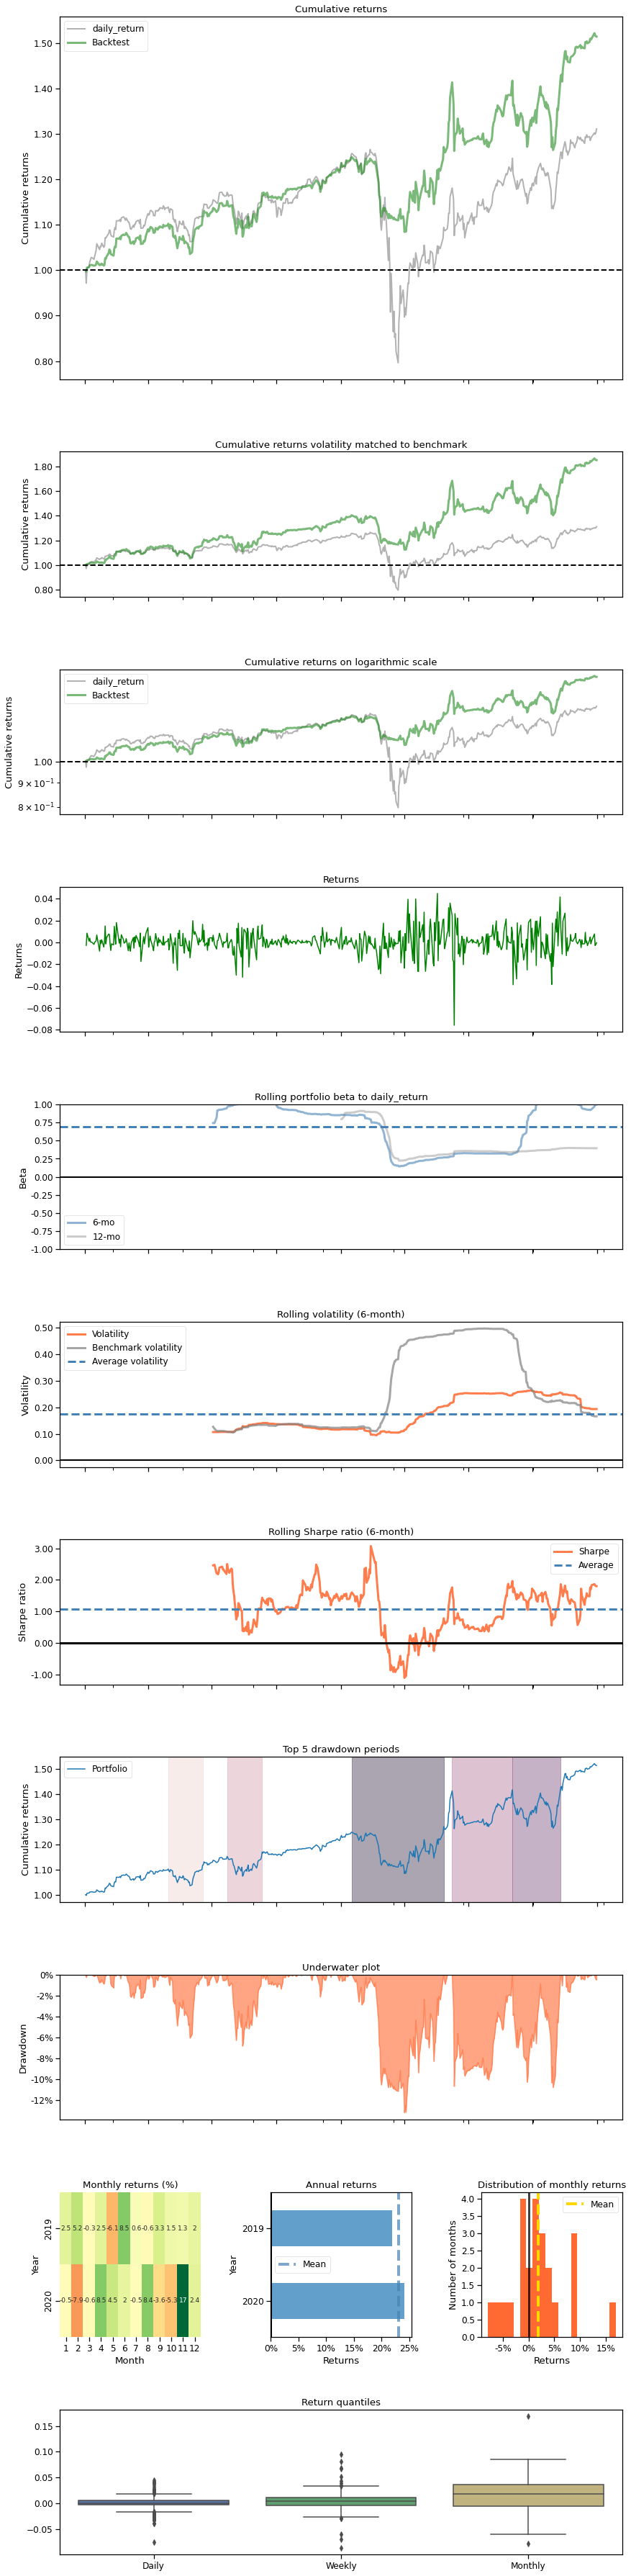

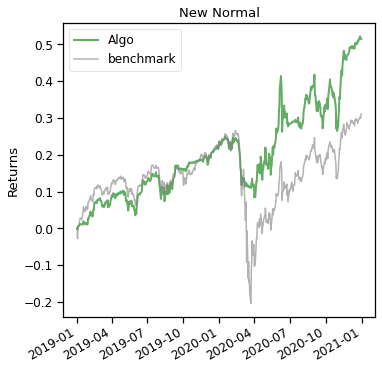

In [10]:
args = Arguments(if_on_policy=True)
args.agent = agent.AgentTRPO()
args.env = StockTradingEnv(cwd='./', if_eval=True)
args.if_remove = False
args.cwd = './AgentTRPO/StockTradingEnv-v2_0'
args.init_before_training()

prediction = args.env.trade_prediction(args, torch)
args.env.backtest_plot(prediction, baseline_ticker = '^DJI', baseline_start = '2019-01-01', baseline_end = '2021-01-01')